Check transfer learning with VGG16 - Data slice 2 

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
batch_size = 32
img_height = 224
img_width = 224
train_dir = '../input/marble-surface-anomaly-detection-2/dataset/train'
test_dir = '../input/marble-surface-anomaly-detection-2/dataset/test'

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123, ## Change  the seed
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2249 files belonging to 4 classes.
Using 1800 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2249 files belonging to 4 classes.
Using 449 files for validation.


In [11]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 688 files belonging to 4 classes.


In [12]:
class_names = train_ds.class_names
print(class_names)

['crack', 'dot', 'good', 'joint']


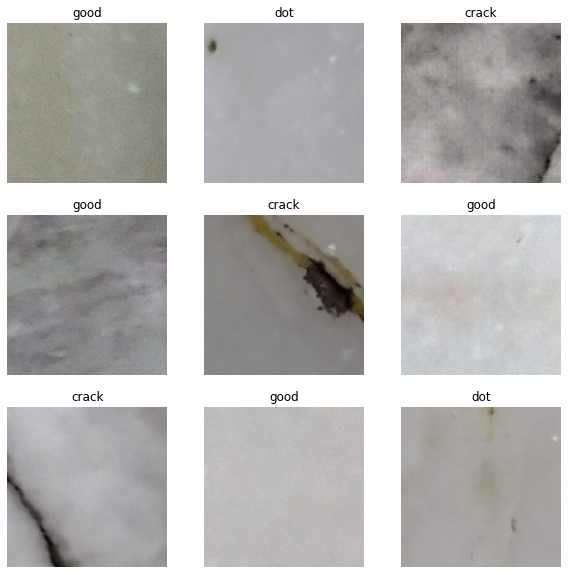

In [13]:
## Visualize train dataset images 

image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

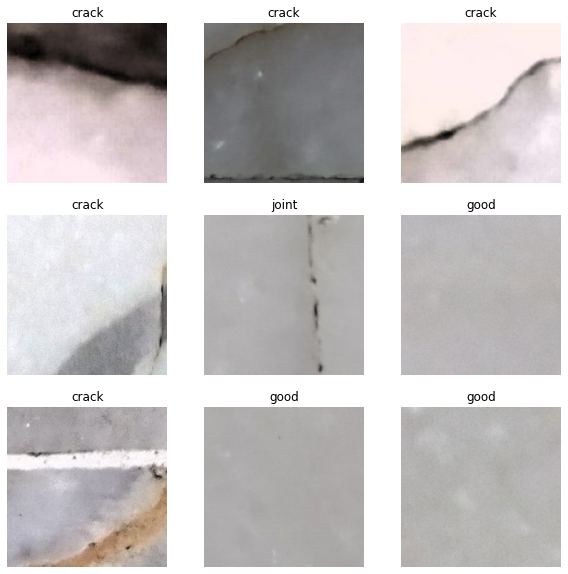

In [14]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

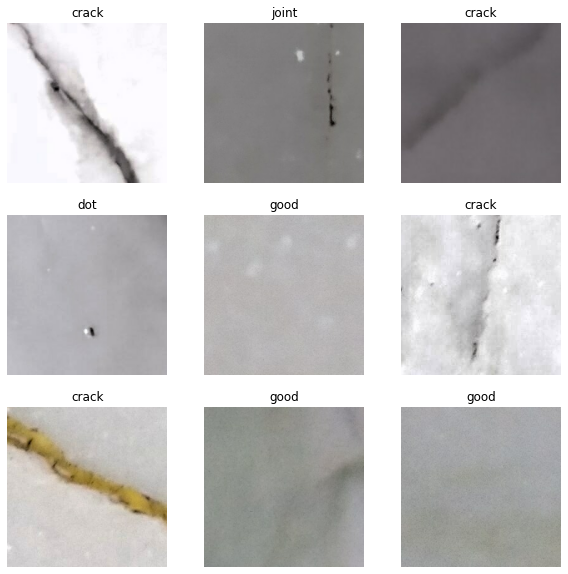

In [15]:
## visualize test images 
image_batch, label_batch = next(iter(test_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

Check the number of classes in the train , validation and test images.

In [47]:
## since data is read in a tensorflow batchdataset , need to convert the images into array as below for VGG16 preprocessing
y_train = np.array([])

j = 0
for x, y in train_ds:
    if j ==0:
        x_train = tf.keras.applications.vgg16.preprocess_input(x)
        j = 1
    else:
        x_train = np.concatenate([x_train , tf.keras.applications.vgg16.preprocess_input(x)])
        
        
    y_train = np.concatenate([y_train , y.numpy()])
    
print("Train labels \n{} ".format(pd.Series(y_train).value_counts()))


Train labels 
0.0    794
2.0    680
3.0    250
1.0     76
dtype: int64 


In [48]:
print(x_train.shape)

(1800, 224, 224, 3)


In [52]:
y_val = np.array([])

j = 0
for x, y in val_ds:
    if j ==0:
        x_val = tf.keras.applications.vgg16.preprocess_input(x)
        j = 1
    else:
        x_val = np.concatenate([x_val , tf.keras.applications.vgg16.preprocess_input(x)])
        
        
    y_val = np.concatenate([y_val , y.numpy()])
    
print("Validation labels \n{} ".format(pd.Series(y_val).value_counts()))
print("\n")
print(x_val.shape)

Validation labels 
0.0    190
2.0    180
3.0     63
1.0     16
dtype: int64 


(449, 224, 224, 3)


In [51]:
y_test = np.array([])

j = 0
for x, y in test_ds:
    if j ==0:
        x_test = tf.keras.applications.vgg16.preprocess_input(x)
        j = 1
    else:
        x_test = np.concatenate([x_test , tf.keras.applications.vgg16.preprocess_input(x)])
        
        
    y_test = np.concatenate([y_test , y.numpy()])
    
print("Test labels \n{} ".format(pd.Series(y_test).value_counts()))
print("\n")
print(x_test.shape)

Test labels 
2.0    340
0.0    246
3.0     78
1.0     24
dtype: int64 


(688, 224, 224, 3)


The distribution of classes in the train and valdation data is nearly the same. More 'crack' cases followed by 'good' , 'joint' and 'dot.  
How ever in the test data, 'good' cases more than 'crack'.  

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4100      
Total params: 15,244,100
Trainable params: 529,412
Non-trainable params: 14,714,688
_________________________________________________________________


2022-01-25 08:59:00.911949: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1083801600 exceeds 10% of free system memory.
2022-01-25 08:59:01.981720: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1083801600 exceeds 10% of free system memory.
2022-01-25 08:59:04.065199: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


CPU times: user 1min 14s, sys: 23.4 s, total: 1min 38s
Wall time: 3min 55s
22/22 [==============================] - 3s 135ms/step - loss: 0.2885 - accuracy: 0.9767
Test image accuracy :0.9767441749572754


2022-01-25 09:03:01.298016: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


              precision    recall  f1-score   support

       crack       0.96      0.99      0.97       246
         dot       0.89      1.00      0.94        24
        good       1.00      0.97      0.99       340
       joint       0.99      0.94      0.96        78

    accuracy                           0.98       688
   macro avg       0.96      0.98      0.97       688
weighted avg       0.98      0.98      0.98       688



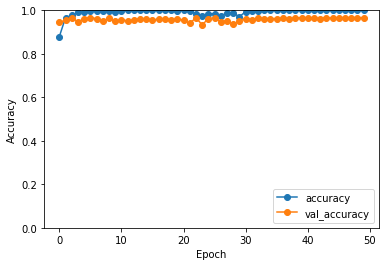

In [53]:
# Transfer learning with VGG16 . 

base_Net = tf.keras.applications.VGG16(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = False
#Adding the final layers to the above base models where the actual classification is done in the dense layers

model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(4, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

# Training the CNN on the Train data and evaluating it on the val data
%time history = model_Net.fit(x_train ,y_train ,  validation_data = (x_val, y_val), epochs = 50, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(x_test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model_Net.save('vgg16')
##

test_predicted = model_Net.predict(x_test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = class_names))